In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
# import torch.multiprocessing as mp
# mp.set_start_method('spawn') 

In [52]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
#         self.conv1 = nn.Conv2d(1, 6, 5)
#         self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(1, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 1)

    def forward(self, x):
        # Max pooling over a (2, 2) window
#         x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
#         # If the size is a square you can only specify a single number
#         x = F.max_pool2d(F.relu(self.conv2(x)), 2)
#         x = x.view(-1, self._num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#     @staticmethod
#     def _num_flat_features(x):
#         size = x.size()[1:]  # all dimensions except the batch dimension
#         num_features = 1
#         for s in size:
#             num_features *= s
#         return num_features

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=1, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=1, bias=True)
)


In [89]:
from torch.utils.data import Dataset, DataLoader
class MyDataset(Dataset):
    def __init__(self):
        self._len = int(1e6)
#         x = np.linspace(-2*)
        
    def __len__(self):
        return self._len
    
    def __getitem__(self, idx):
        if idx % 100 == 0: 
            x = 2*100.0 * torch.rand(1,1) - 100.0
            return x, torch.tensor([[0.0]])
            
        x = 2*np.pi * torch.rand(1,1) - np.pi
        return x, np.sin(x)

ds = MyDataset()
for ii in range(5):
    print(ii, ds[ii])

data = np.array([ds[ii] for ii in range(100)])
plt.plot(data[:, 0], data[:, 1], '.')

0 (tensor([[-65.7138]]), tensor([[0.]]))
1 (tensor([[0.1578]]), tensor([[0.1571]]))
2 (tensor([[-2.1535]]), tensor([[-0.8350]]))
3 (tensor([[-3.1162]]), tensor([[-0.0254]]))
4 (tensor([[0.6239]]), tensor([[0.5842]]))


In [90]:
import torch.optim as optim

dataloader = DataLoader(ds, batch_size=4,
                        shuffle=True, num_workers=0)

criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


device = torch.device('cuda')
print(device)


cuda


In [94]:
x, y = sample_batched
net(x)

tensor([[[nan]],

        [[nan]],

        [[nan]],

        [[nan]]], grad_fn=<AddBackward0>)

In [92]:
# net.to(device)

epoch = 0
running_loss = 0.0
for i_batch, sample_batched in enumerate(dataloader):
    x, y = sample_batched
    
    optimizer.zero_grad()
    outputs = net(x)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    print(loss.item())
    if i_batch % 2000 == 1999:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i_batch + 1, running_loss / 2000))
        running_loss = 0.0

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


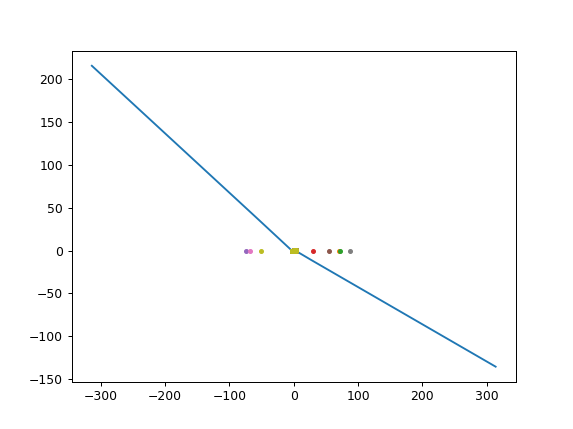

In [56]:
%matplotlib notebook
test_x = np.linspace(-100*np.pi, 100*np.pi, 1000)
test_y = np.array([net(torch.tensor([x])) for x in test_x])
plt.plot(test_x, test_y)